## YOLO (You Only Look Once)
YOLO is a state-of-the-art, real-time object detection algorithm.YOLO uses *Darknet*, an open source, deep neural network framework written by the creators of YOLO.

## Importing Resources

We will start by loading the required packages into Python. 
* We will be using *OpenCV* to load our images, *matplotlib* to plot them, a`utils` module that contains some helper functions, and a modified version of *Darknet*.
* We won't be doing any training. Instead, we will be using a set of pre-trained weights that were trained on the Common Objects in Context (COCO) database. 

In [1]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

# Setting Up The Neural Network

* We will be using the latest version of YOLO, known as YOLOv3.
* The `yolov3.cfg` file contains the network architecture used by YOLOv3 and placed it in the `/cfg/` folder. 
* Similarly `yolov3.weights` file that contains the pre-trained weights is placed in the `/weights/` directory. 
* Finally, the `/data/` directory, contains the `coco.names` file that has the list of the 80 object classes that the weights were trained to detect.

In [2]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes from utils.py
class_names = load_class_names(namesfile)

# Taking a Look at The Neural Network
We can print the network using the `.print_network()` function.

In [3]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

As we can see, the neural network used by YOLOv3 consists mainly of convolutional layers, with some shortcut connections and upsample layers. For a full description of this network please refer to the <a href="https://pjreddie.com/media/files/papers/YOLOv3.pdf">YOLOv3 Paper</a>.

# Loading and Resizing Our Images

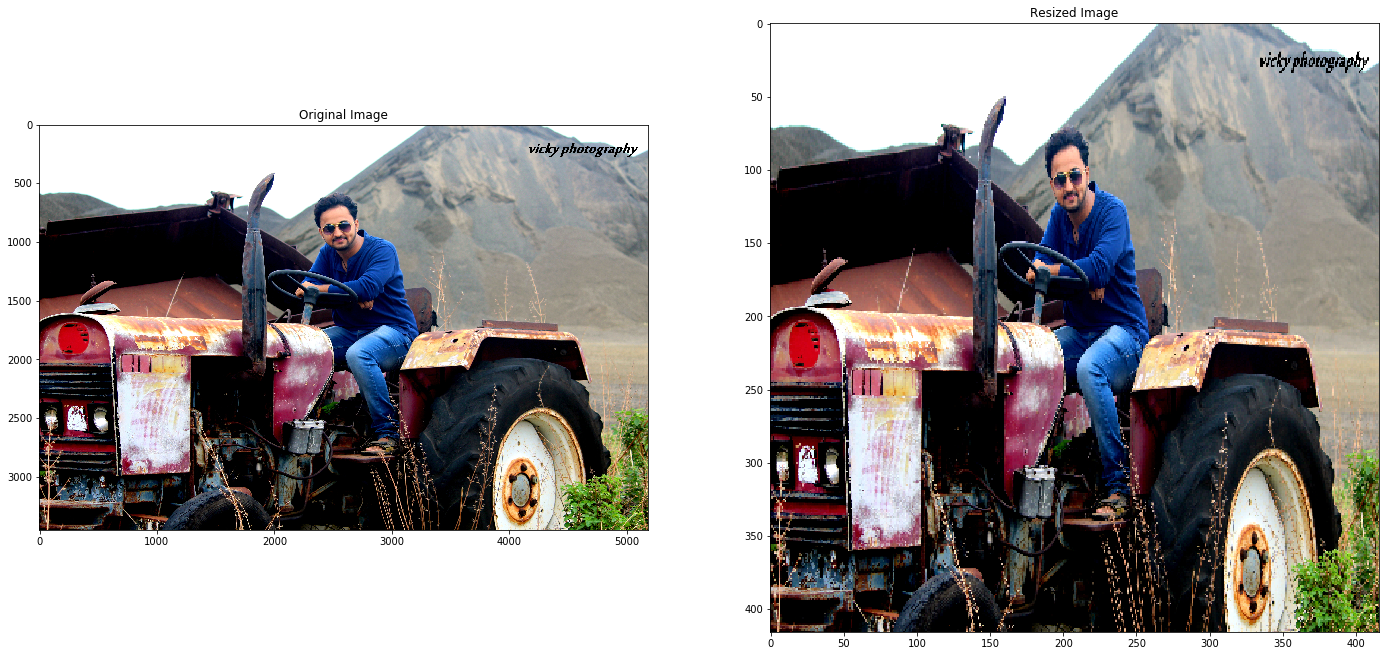

In [4]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/img3.jpg')

# Convert the image from BGR to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

## Setting the Thresholds for Non-Maximal Suppression(nms) and Intersection Over Union(IoU)

In [5]:
# Set the NMS threshold
nms_thresh = 0.6

# Set the IOU threshold
iou_thresh = 0.4

## Object Detection

`show_objects` function takes image as an arguement and displays all the objects inside that image

In [6]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [12.0, 7.0]

def show_objects(img_name = 'img5.jpg'):

    # Load the image
    image_path = './images/{}'.format(img_name)
    img = cv2.imread(image_path)

    # Convert the image to RGB
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # We resize the image to the input width and height of the first layer of the network.    
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Detect objects in the image
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
    # print('Boxes from detect_objects()',boxes)
    """
    Each bounding box contains 7 parameters: 
    the coordinates (x, y) of the center of the bounding box, 
    the width w and height h of the bounding box, 
    the confidence detection level, 
    the object class probability 
    and the object class id.
    """
    
    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    #Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes, class_names, plot_labels = True)

## Testing Object Detection on some of the sample images



It took 1.516 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. person: 1.000000
2. truck: 0.634678


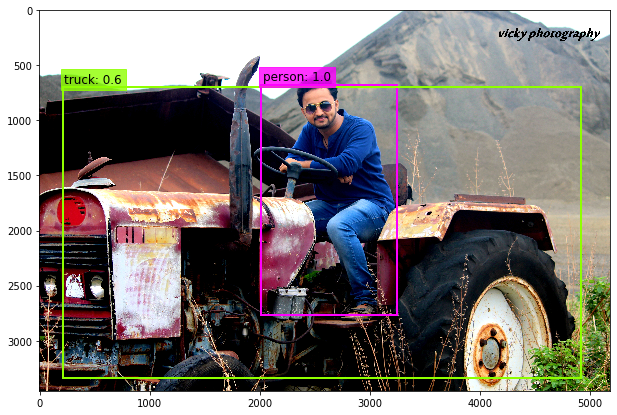

----------------------------------------------------------------------------------------------------


It took 1.381 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. dog: 0.999997
2. truck: 0.992364
3. bicycle: 0.999998


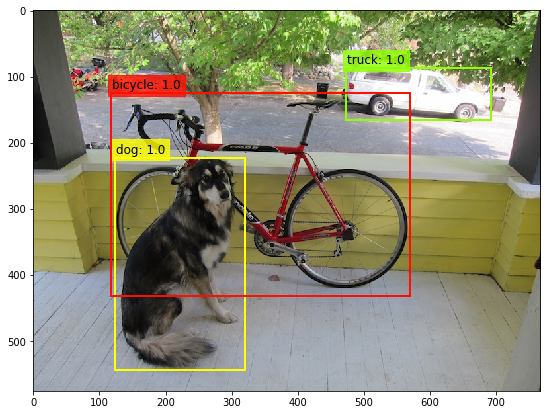

----------------------------------------------------------------------------------------------------


It took 2.680 seconds to detect the objects in the image.

Number of Objects Detected: 28 

Objects Found and Confidence Level:

1. person: 0.999996
2. person: 1.000000
3. car: 0.707238
4. truck: 0.933031
5. car: 0.658085
6. truck: 0.666981
7. person: 1.000000
8. traffic light: 1.000000
9. person: 1.000000
10. car: 0.997369
11. bus: 0.998023
12. person: 1.000000
13. person: 1.000000
14. person: 1.000000
15. person: 1.000000
16. person: 1.000000
17. traffic light: 1.000000
18. traffic light: 1.000000
19. handbag: 0.997282
20. traffic light: 1.000000
21. car: 0.989741
22. traffic light: 1.000000
23. traffic light: 0.999999
24. person: 0.999999
25. truck: 0.715037
26. traffic light: 1.000000
27. person: 0.999993
28. person: 0.999996


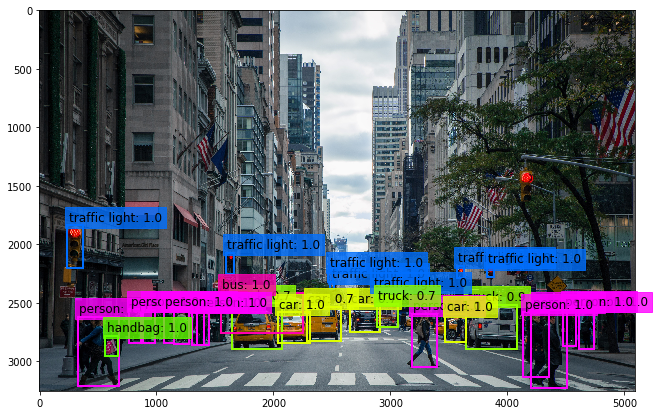

----------------------------------------------------------------------------------------------------


It took 1.886 seconds to detect the objects in the image.

Number of Objects Detected: 17 

Objects Found and Confidence Level:

1. bowl: 0.999978
2. bowl: 0.999683
3. bowl: 0.999968
4. bowl: 0.999995
5. spoon: 0.996658
6. bowl: 0.999998
7. bowl: 0.999983
8. spoon: 0.999949
9. diningtable: 0.999985
10. bowl: 0.999991
11. bowl: 0.999346
12. spoon: 0.999407
13. spoon: 0.943998
14. bowl: 0.999959
15. carrot: 0.999987
16. carrot: 1.000000
17. carrot: 0.999996


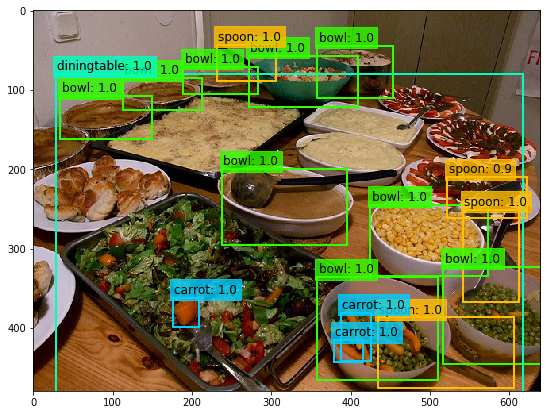

----------------------------------------------------------------------------------------------------


It took 1.775 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. wine glass: 1.000000
2. bottle: 1.000000
3. chair: 0.999749


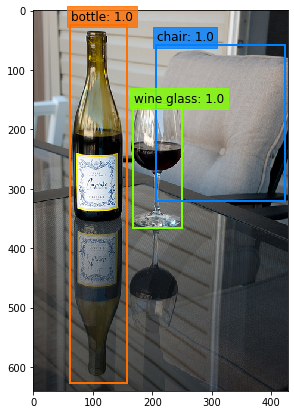

In [7]:
img_list = ['img3.jpg','dog.jpg','city_scene.jpg', 'food.jpg','wine.jpg']

count = 0
length = len(img_list)
while(count<length):
    show_objects(img_list[count])
    count+=1
    if(count !=length):
        print('-'*100)